# Poisonous Mushrooms

Properties of mushrooms are investigated in this project. The dataset contains over 8,000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. PCA is first applied to visualize data by reducing the dimensionality from 126 down to 2. Multiple algorithms including clustering including k-means and Gaussian Mixture Model (GMM) are then used to further explore the dataset.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

# additional libraries for formatting
import pandas as pd
import matplotlib.colors as pltcolors
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import warnings

plt.style.use(u"bmh") # custom plot style

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Explained Variance Ratio by K:


K,Explained Variance Ratio,Accumulated Explained Variance Ratio
1,0.1640,0.0000
2,0.1332,0.1640
3,0.1017,0.2973
4,0.0706,0.3990
5,0.0387,0.4696
10,0.0223,0.5083
20,0.0115,0.5306
30,0.0070,0.5421
40,0.0044,0.5491
50,0.0020,0.5535


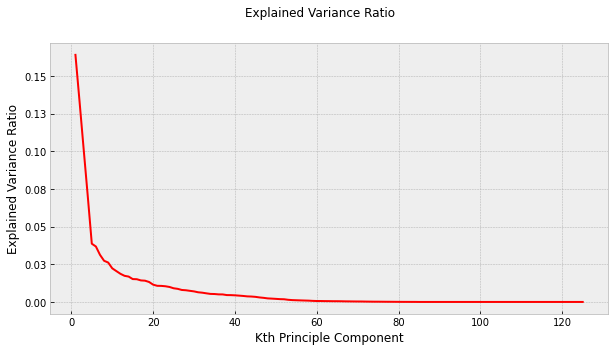

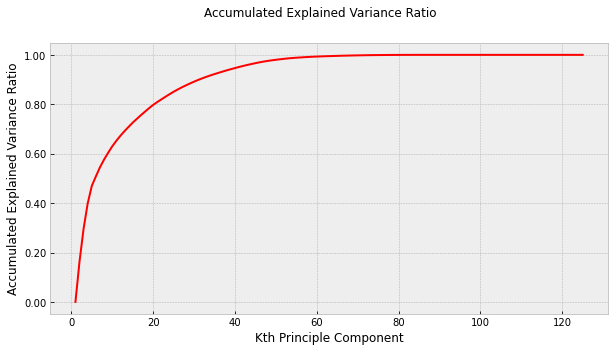

In [5]:
#def P1():

### STUDENT START ###
def get_pca_variance_df(data:np.ndarray, arr: np.ndarray) -> pd.DataFrame:
    """Perform PCA and return a table with three columns: 
        - K
        - Explained Variance Ratio
        - Accumulated Explained Variance Ratio
    """
    pca = PCA()
    pca.fit(data)
    ratios = pca.explained_variance_ratio_[k_arr - 1]
    ratios_acc = [sum(ratios[:i]) for i, r in enumerate(ratios)]

    return pd.DataFrame(np.vstack([k_arr, ratios, ratios_acc]).T, 
                        columns=['K', 
                                 'Explained Variance Ratio', 
                                 'Accumulated Explained Variance Ratio'])

# display explained variance with requested K values
k_arr = np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50])
print_df = get_pca_variance_df(train_data, k_arr)
s = print_df.style
s.format({
    'K': '{:.0f}'.format,
    'Explained Variance Ratio': '{:,.4f}'.format,
    'Accumulated Explained Variance Ratio': '{:,.4f}'.format
})
s = s.hide_index()
print('Explained Variance Ratio by K:')
display(s)

# plot explained variance with all possible K values
k_arr = np.arange(1, train_data.shape[1])
plot_df = get_pca_variance_df(train_data, k_arr)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Explained Variance Ratio')
ax.plot(plot_df['K'], 
        plot_df['Explained Variance Ratio'], 
        color='r', 
        linestyle='solid')
ax.set_ylabel('Explained Variance Ratio')
ax.set_xlabel('Kth Principle Component')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
print('')
plt.show()
pass

# plot accumulated explained variance with all possible K values
plot_df = get_pca_variance_df(train_data, k_arr)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Accumulated Explained Variance Ratio')
ax.plot(plot_df['K'], 
        plot_df['Accumulated Explained Variance Ratio'], 
        color='r', 
        linestyle='solid')
ax.set_ylabel('Accumulated Explained Variance Ratio')
ax.set_xlabel('Kth Principle Component')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
print('')
plt.show()
pass
### STUDENT END ###
#P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. 

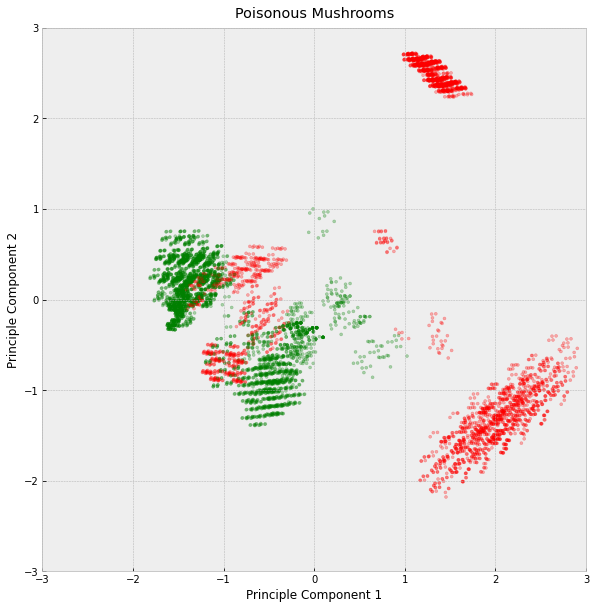

In [6]:
#def P2():

### STUDENT START ###
pca = PCA(n_components=2)
training_data_reduced = pca.fit_transform(train_data)

# plot
label_colors = np.zeros((train_labels.shape[0], 4))
label_colors[train_labels == 1] = pltcolors.to_rgba('r', alpha=0.3)
label_colors[train_labels == 0] = pltcolors.to_rgba('g', alpha=0.3)
fig, ax = plt.subplots(figsize=(10, 10))
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(training_data_reduced[:, 0], 
           training_data_reduced[:, 1], 
           marker='.',
           c=label_colors)
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_title('Poisonous Mushrooms', pad=10)
pass
### STUDENT END ###

#P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

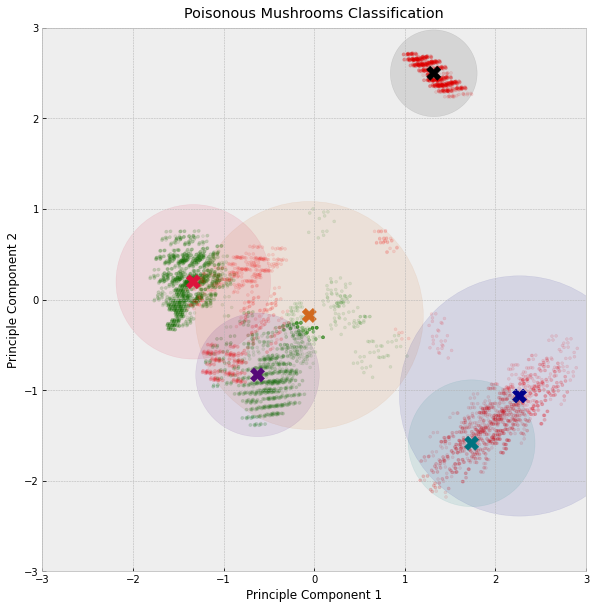

In [7]:
#def P3():

### STUDENT START ###
training_data_reduced = PCA(n_components=2).fit_transform(train_data)
kmeans = KMeans(n_clusters=6, random_state=0).fit(training_data_reduced)
distances = KMeans(n_clusters=6, random_state=0).fit_transform(training_data_reduced)

# plot data
label_colors = np.zeros((train_labels.shape[0], 4))
label_colors[train_labels == 1] = pltcolors.to_rgba('r', alpha=0.1)
label_colors[train_labels == 0] = pltcolors.to_rgba('g', alpha=0.1)
fig, ax = plt.subplots(figsize=(10, 10))   
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(training_data_reduced[:, 0], 
           training_data_reduced[:, 1], 
           marker='.',
           c=label_colors)
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_title('Poisonous Mushrooms Classification', pad=10)

# plot centroids
centriods = kmeans.cluster_centers_

# distances to centroids
d_to_c_arr = distances[np.arange(distances.shape[0]), 
                       kmeans.labels_]
# print(distances)
# print(d_to_c_arr)
# print(kmeans.labels_)

# find max distance in each centroid
max_distances = []
for i in np.arange(6):
    d_arr = d_to_c_arr[kmeans.labels_ == i]
    max_distances.append(np.max(d_arr))

# plot centroids
cluster_colors = ['chocolate', 'black', 'crimson', 'darkblue', 'indigo', 'teal']
ax.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           marker='X',
           s=200,
           c=cluster_colors)

# plot circles
alpha = 0.1
cluster_colors = list(map(lambda c: pltcolors.to_rgba(c, alpha=alpha), 
                          cluster_colors))
for i, d in enumerate(max_distances):
    circle = plt.Circle((centriods[i, 0], centriods[i, 1]), 
                        radius = d, 
                        color=cluster_colors[i])
    ax.add_artist(circle)
pass

### STUDENT END ###

#P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a covariance matrix type.  

Note: All examples are poisonous. Colors indicate the cuslters formed by GMM.


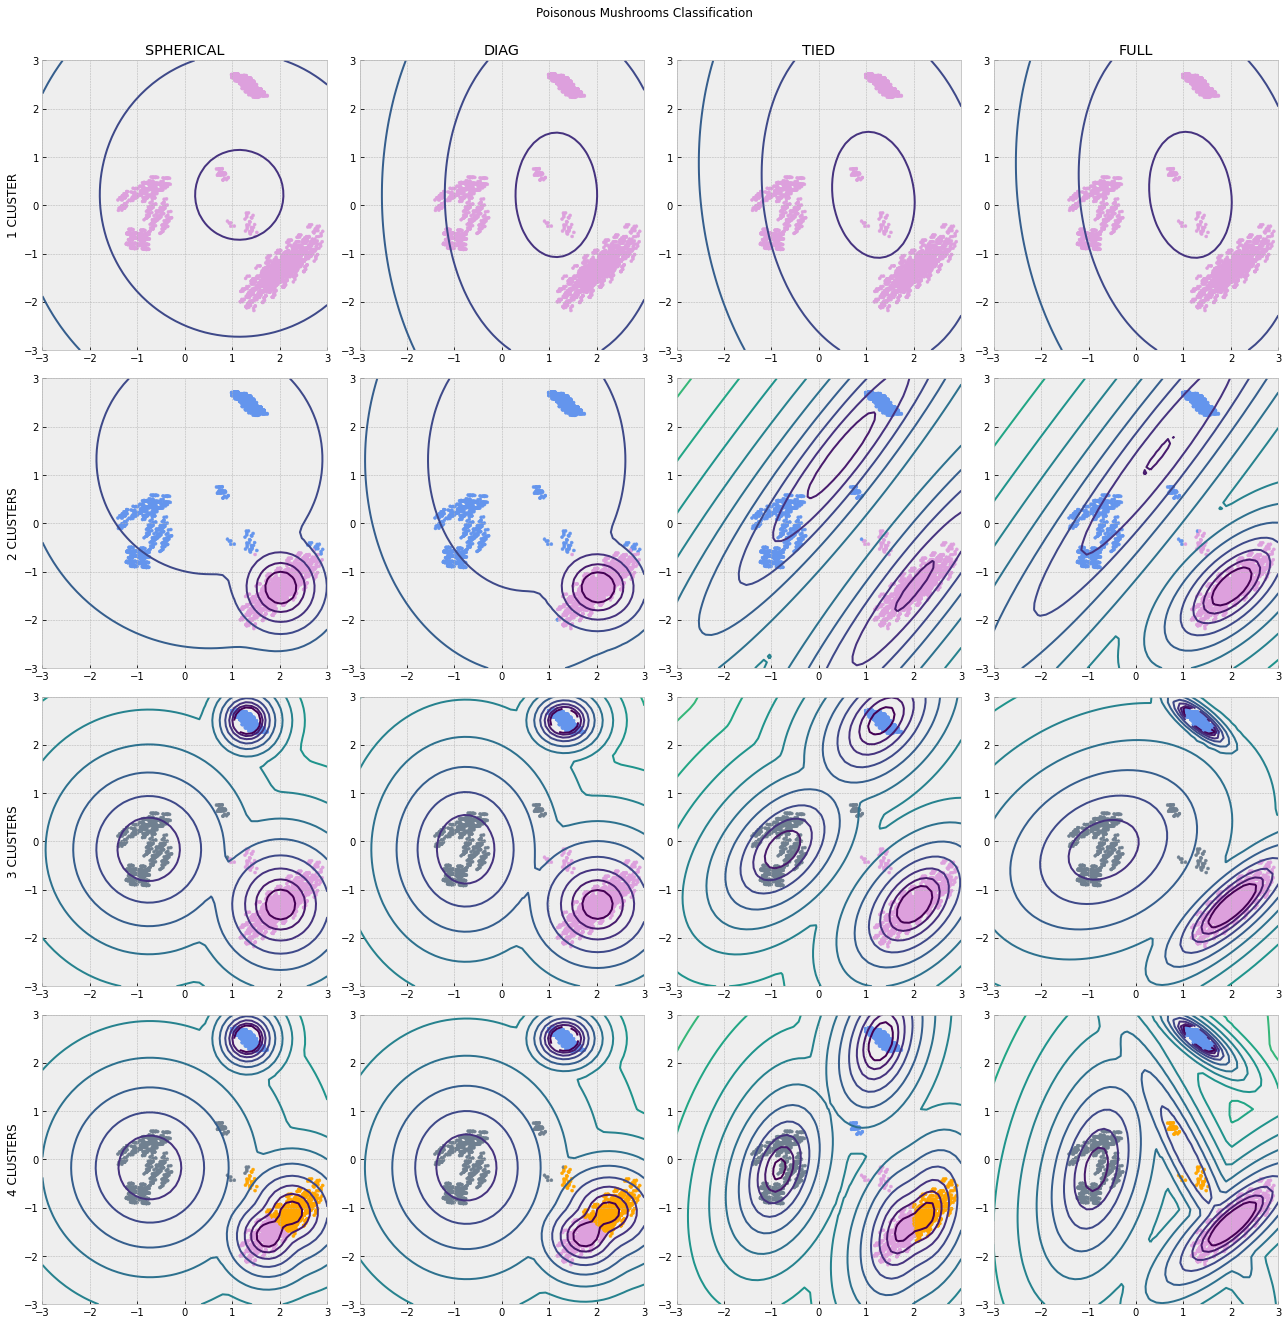

In [14]:
#def P4():

### STUDENT START ###
N_COMPONENTS = list(range(1, 5))
COVAR_TYPES = ('spherical', 'diag', 'tied', 'full')

# apply PCA
training_data_reduced = PCA(n_components=2).fit_transform(train_data)
training_data_reduced = training_data_reduced[train_labels == 1]

# plot
x_max, y_max = 3, 3
x_min, y_min = -3, -3
fig, axes = plt.subplots(len(N_COMPONENTS), 
                         len(COVAR_TYPES), 
                         figsize=(18, 18))
fig.suptitle('Poisonous Mushrooms Classification', y=1.02)
warnings.simplefilter(action='ignore')
for i, n_component in enumerate(N_COMPONENTS):
    for j, cover_type in enumerate(COVAR_TYPES):
        gmm = GaussianMixture(n_components=n_component,
                              covariance_type=cover_type,
                              random_state=12345)
        labels = gmm.fit_predict(training_data_reduced).tolist()
        colors = ['plum', 'cornflowerblue', 'slategrey', 'orange']
        labels = list(map(lambda x: colors[x], labels))
        
        # plot training data
        ax = axes[i][j]
        ax.scatter(training_data_reduced[:, 0], 
                   training_data_reduced[:, 1], 
                   marker='.',
                   c=labels,
                   cmap=plt.cm.coolwarm)
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        
        if i == 0:
            ax.set_title(cover_type.upper())
        if j == 0:
            label = "CLUSTER"
            if i > 0:
                label = "CLUSTERS"
            ax.set_ylabel(str(n_component) + " " + label)
        
        # plot contour
        x = np.linspace(x_min, x_max)
        y = np.linspace(y_min, y_max)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -gmm.score_samples(XX)
        Z = Z.reshape(X.shape)
        ax.contour(X, Y, Z, 
                   norm=LogNorm(vmin=1.0, vmax=1000.0),
                   levels=np.logspace(0, 2, 10))

fig.tight_layout()
print('Note: All examples are poisonous. Colors indicate the cuslters formed by GMM.')
plt.show()
pass
### STUDENT END ###

#P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

In [9]:
#def P5():

### STUDENT START ###

# apply PCA on train
pca = PCA(n_components=2)
pca.fit(train_data)
train_reduced = pca.transform(train_data)
test_reduced = pca.transform(test_data)

# filter for positive and negative examples
train_reduced_pos = train_reduced[train_labels == 1]
train_reduced_neg = train_reduced[train_labels == 0]

# gmm
gmm_pos = GaussianMixture(n_components=4,
                          covariance_type='full',
                          random_state=12345)
gmm_neg = GaussianMixture(n_components=4,
                          covariance_type='full',
                          random_state=12345)
gmm_pos.fit(train_reduced_pos)
gmm_neg.fit(train_reduced_neg)

# predict probabilities using gmm
test_probas_pos = gmm_pos.score_samples(test_reduced)
test_probas_neg = gmm_neg.score_samples(test_reduced)

len_ = test_probas_pos.shape[0]
final_probas = np.zeros(len_ * 2).reshape(len_, 2)
final_probas[:, 0] = test_probas_neg
final_probas[:, 1] = test_probas_pos

preds = np.argmax(final_probas, axis=1)
report = metrics.classification_report(test_labels, preds)
accuracy = metrics.classification_report(test_labels, 
                                         preds, 
                                         output_dict=True)['accuracy']
print('Overall Accuracy: {:.2f}'.format(accuracy))
print('Full Report:')
print(report)

### STUDENT END ###

#P5()

Overall Accuracy: 0.95
Full Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       406
           1       0.99      0.93      0.96       718

    accuracy                           0.95      1124
   macro avg       0.94      0.96      0.95      1124
weighted avg       0.95      0.95      0.95      1124



### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters. Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

In [13]:
#def P6():

### STUDENT START ###
COVAR_TYPES = ('spherical', 'diag', 'tied', 'full')
GMM_COMPONENTS = list(range(1, 15))
PCA_COMPONENTS = list(range(1, 15))

def count_covar(gmm: GaussianMixture) -> int:
    """Function to count the covariance as requred.
    """
    arr = gmm.covariances_.flatten()
    return len(set(arr[arr > 0]))

max_combo = {'Accuracy': 0,
             'Covariance Type': '',
             'Number of GMM Components': 0, 
             'Number of PCA Components': 0}
i = 0
for covar_type in COVAR_TYPES:
    print(f'Evaluating {covar_type}...')
    
    for n_gmm in GMM_COMPONENTS:
        for n_pca in PCA_COMPONENTS:
            pca = PCA(n_components=n_pca)
            pca.fit(train_data)
            train_reduced = pca.transform(train_data)
            test_reduced = pca.transform(test_data)

            # filter for positive and negative examples
            train_reduced_pos = train_reduced[train_labels == 1]
            train_reduced_neg = train_reduced[train_labels == 0]

            # gmm
            gmm_pos = GaussianMixture(n_components=n_gmm,
                                      covariance_type=covar_type,
                                      random_state=12345)
            gmm_neg = GaussianMixture(n_components=n_gmm,
                                      covariance_type=covar_type,
                                      random_state=12345)
            gmm_pos.fit(train_reduced_pos)
            gmm_neg.fit(train_reduced_neg)
        
            # calculate # of parameters
            # means_: array-like, shape (n_components, n_features)
            # weights_: array-like, shape (n_components,)
            # covariances_: array-like
            n_param = 0
            if covar_type is 'tied':
                # positive
                c_mean = gmm_pos.means_.shape[0] * gmm_pos.means_.shape[1]
                c_weight = gmm_pos.weights_.shape[0]
                c_covar = count_covar(gmm_pos)
                n_param = c_mean + c_weight + c_covar - 1
                
                # negative
                c_mean = gmm_neg.means_.shape[0] * gmm_neg.means_.shape[1]
                c_weight = gmm_neg.weights_.shape[0]
                c_covar = count_covar(gmm_neg)
                n_param += c_mean + c_weight + c_covar - 1
            else:
                # positive
                c_mean = n_pca * n_gmm
                c_weight = n_gmm
                c_covar = 0
                for cov in gmm_pos.covariances_:
                    arr = cov.flatten()
                    c_covar += len(set(arr[arr > 0]))
                c_covar = c_covar 
                c_pos = (c_mean + c_weight + c_covar) - 1
                
                # negative
                c_mean = n_pca * n_gmm
                c_weight = n_gmm
                c_covar = 0
                for cov in gmm_neg.covariances_:
                    arr = cov.flatten()
                    c_covar += len(set(arr[arr > 0]))
                c_covar = c_covar 
                c_neg = (c_mean + c_weight + c_covar) - 1
                n_param = c_neg + c_pos
        
            # skip if # of params is above thd
            if n_param > 50:
                continue
            
            # predict probabilities using gmm
            test_probas_pos = gmm_pos.score_samples(test_reduced)
            test_probas_neg = gmm_neg.score_samples(test_reduced)
            
            len_ = test_probas_pos.shape[0]
            final_probas = np.zeros(len_ * 2).reshape(len_, 2)
            final_probas[:, 0] = test_probas_neg
            final_probas[:, 1] = test_probas_pos
            
            preds = np.argmax(final_probas, axis=1)
            
            # store ONLY the best accuracy
            accuracy = metrics.accuracy_score(test_labels, preds)
            if accuracy > max_combo['Accuracy']:
                max_combo = {'Accuracy': accuracy,
                             'Covariance Type': covar_type,
                             'Number of GMM Components': n_gmm, 
                             'Number of PCA Components': n_pca,
                             'Number of Parameters': int(n_param)}

# print final result
print('\nBest model:')
for k, v in max_combo.items():
    print(f'{k}: {v}')
### STUDENT END ###

#P6()

Evaluating spherical...
Evaluating diag...
Evaluating tied...
Evaluating full...

Best model:
Accuracy: 0.9741992882562278
Covariance Type: spherical
Number of GMM Components: 2
Number of PCA Components: 11
Number of Parameters: 50
